In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
!ls ./Data


Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
# ols_diag(df,X,model, nlag=1, remove_outliers=False):
from ols_diag import ols_diag

### 4.       The file Baseball96.xlsx gives runs scored, singles, doubles, triples, home runs, and bases stolen for each major league baseball team during the 1996 season. Use this data to determine the effects of singles, doubles, and other activities on run production.
 

In [3]:
bb=pd.read_excel("./Data/Baseball96.xlsx",)
bb.head()

,Team,Runs,Singles,Doubles,Triples,HR's,BB's,SB's
0,Cleveland,840,952,279,23,207,542,132
1,Chicago Sox,755,982,252,37,146,576,110
2,Boston,791,907,286,31,175,560,99
3,Minnesota,703,974,270,34,120,471,105
4,California,801,927,252,25,186,564,58


In [4]:
bb.columns

Index(['Team', 'Runs', 'Singles', 'Doubles', 'Triples', 'HR's', 'BB's',
       'SB's'],
      dtype='object')

In [5]:
y_4=bb[["Runs"]]
X_4=bb[['Singles', 'Doubles', 'Triples', 'HR\'s', 'BB\'s','SB\'s']]

In [6]:
X_4=sm.add_constant(X_4)
model_4=sm.OLS(y_4, X_4).fit()

#### Iteration 1: OLS Modeling 

In [7]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     56.97
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           6.55e-12
Time:                        03:32:15   Log-Likelihood:                -117.83
No. Observations:                  28   AIC:                             249.7
Df Residuals:                      21   BIC:                             259.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -396.9200     70.951     -5.594      0.000    -544.471    -249.369
Singles        0.5185      0.072      7.203      0.000       0.369       0.668
Doubles        0.7829      0.156      5.032      0.000       0.459       1.107
Triples        0.7800      0.559      1.396      0.177      -0.382       1.942
HR's           1.4060      0.143      9.800      0.000       1.108       1.704
BB's           0.3750      0.079      4.751      0.000       0.211       0.539
SB's           0.1635      0.116      1.409      0.173      -0.078       0.405
==============================================================================
Omnibus:                        7.582   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                8.898
Skew:                           0.453   Prob(JB):                       0.0117
Kurtosis:                       5.609   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Iteration 1: OLS Diaganostic Test 

Dataset: 	 28
X: 	 28
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode

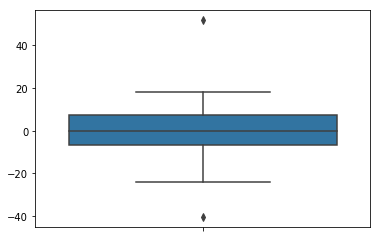

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

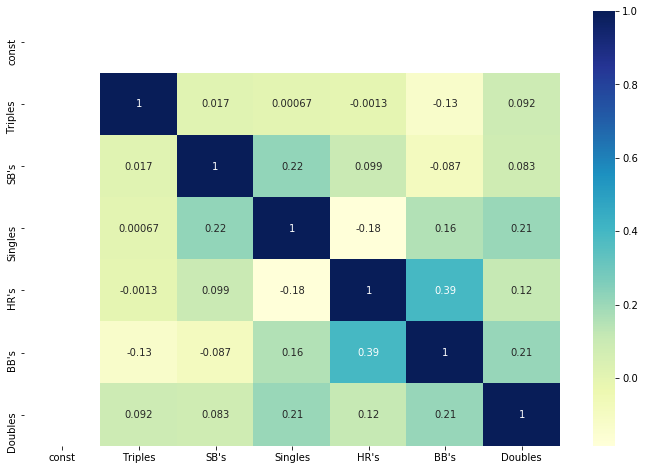

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [8]:
ols_diag(bb,X_4,model_4, nlag=1, remove_outliers=False)

* We have two importatant warnings:


1. Residuals are not normally distributed and 
2. We have outliers as can be seen from box plot and the mentioned row numbers

* So we will go for second iteration where residuals will be removed before performing 

#### Iteration 2: OLS Modeling

In [9]:
rows_to_remove=[4, 7, 12, 20]
bb=bb.drop(bb.index[rows_to_remove])
y_4=y_4.drop(y_4.index[rows_to_remove])
X_4=X_4.drop(X_4.index[rows_to_remove])
model_4=sm.OLS(y_4, X_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.36e-14
Time:                        03:32:15   Log-Likelihood:                -84.490
No. Observations:                  24   AIC:                             183.0
Df Residuals:                      17   BIC:                             191.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -353.5432     37.681     -9.382      0.000    -433.044    -274.043
Singles        0.5063      0.041     12.484      0.000       0.421       0.592
Doubles        0.8153      0.099      8.205      0.000       0.606       1.025
Triples        0.0579      0.322      0.180      0.860      -0.622       0.737
HR's           1.4344      0.080     17.886      0.000       1.265       1.604
BB's           0.3294      0.041      7.954      0.000       0.242       0.417
SB's           0.1572      0.066      2.367      0.030       0.017       0.297
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.218
Skew:                          -0.187   Prob(JB):                        0.897
Kurtosis:                       2.721   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Iteration 2: OLS Diaganostic Test 

Dataset: 	 24
X: 	 24
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Good
Reason: Residual Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode select

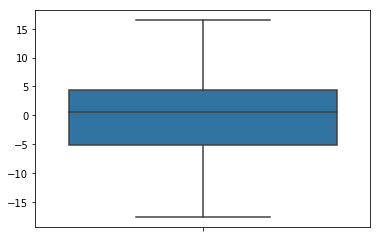

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

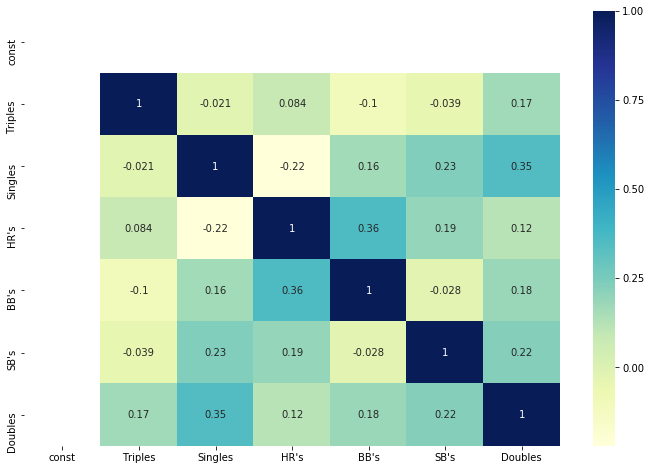

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [10]:
ols_diag(bb,X_4,model_4, nlag=1, remove_outliers=False)

#### Ans 4 and Conclusion

* It seems that our diagnostic test will keep on recommednig to remove outliers and hence should be stopped here for further removal of data till we have no data at all. But as we see from  above that our Adjysted R squrare have increased from .926 to .980 which is quite good. So we can justify our removal of data.



* From regression we can conclude that:


1. Except triples, every other paramter explains the varaince in Runs.
2. It is recommeded to make more home runs to get more runs
